## Proyecto Shark ##


## PROYECTO SHARK ATACK ##

Primero importamos las librerías que vamos a usar

In [202]:
import pandas as pd
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

Creamos y cargamos el dataset de trabajo en base al excel de Shark Tank

In [204]:
df = pd.read_excel("GSAF5.xls") 

print("¡Archivo cargado con éxito!")
print(df.head())


¡Archivo cargado con éxito!
            Date    Year        Type            Country  \
0   10th January  2026.0  Unprovoked          Australia   
1    8th January  2026.0  Unprovoked  US Virgin Islands   
2   3rd January   2026.0  Unprovoked      New Caledonia   
3  21st December  2025.0  Unprovoked                USA   
4  12th December  2025.0  Unprovoked                USA   

                          State                     Location      Activity  \
0                           NSW                 Avalon Beach       Surfing   
1  Fredricksted Island St Croix                 Dorsch Beach    Snorkeling   
2                          Kélé  Between Bourail and Moindou  Scuba Diving   
3                    California   Lovers Point Pacific Grove      Swimming   
4      Sonoma County California                 Salmon Creek       Surfing   

            Name Sex Age  ...                     Species   \
0   Paul Stanton   M   ?  ...                      Unknown   
1  Arlene Lillis   F  56

Veamos una descripción inicial del dataset, sin limpiar nada:

In [205]:
df.describe()

,Year,original order
count,7063.000000,6799.000000
mean,1935.890981,3401.152081
std,270.825801,1963.076319
min,0.000000,2.000000
25%,1948.000000,1701.500000
50%,1986.000000,3401.000000
75%,2010.000000,5100.500000
max,2026.000000,6802.000000


Generamos una vista general del dataset a través de una función:

In [206]:
def informe(x):
    print("Información del DataFrame:")
    print(x.info())
    print("Descripción estadística:")
    print(x.describe())
    print("Valores nulos:")
    print(x.isnull().sum())
    print("Tipos de datos:")
    print(x.dtypes)
    print("Primeras 5 filas:")
    print(x.head())
    print("Últimas 5 filas:")
    print(x.tail())
    print("Forma del DataFrame:")
    print(x.shape)
    print("columnas")
    print(x.columns)
    

In [207]:
informe(df)
    


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7065 entries, 0 to 7064
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7065 non-null   object 
 1   Year            7063 non-null   float64
 2   Type            7047 non-null   object 
 3   Country         7015 non-null   object 
 4   State           6578 non-null   object 
 5   Location        6498 non-null   object 
 6   Activity        6480 non-null   object 
 7   Name            6846 non-null   object 
 8   Sex             6486 non-null   object 
 9   Age             4070 non-null   object 
 10  Injury          7030 non-null   object 
 11  Fatal Y/N       6504 non-null   object 
 12  Time            3538 non-null   object 
 13  Species         3934 non-null   object 
 14  Source          7045 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href  

## HIPOTESIS 1 ##

Australia y EEUU son los países con más ataques. Aquí nos interesa ampliar info  por estado y locación y fatales.(Variables: Country, State, Location, Fatal Y/N)

Primero haremos una función para analizar los datos y las variables categóricas del excel.

In [208]:
def anali(x):
    print(x.value_counts())
    print(x.unique())
    print(x.nunique())

Ahora solo tomaremos las variables necesarias para la hipotesis a trabajar, quedando un dataset más manejable.

In [209]:
df1=df[['Country','State','Location','Fatal Y/N']]
df1

,Country,State,Location,Fatal Y/N
0,Australia,NSW,Avalon Beach,N
1,US Virgin Islands,Fredricksted Island St Croix,Dorsch Beach,Y
2,New Caledonia,Kélé,Between Bourail and Moindou,N
3,USA,California,Lovers Point Pacific Grove,Y
4,USA,Sonoma County California,Salmon Creek,N
...,...,...,...,...
7060,AUSTRALIA,Western Australia,Roebuck Bay,Y
7061,AUSTRALIA,Western Australia,NaN,Y
7062,USA,North Carolina,Ocracoke Inlet,Y
7063,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Y


veremos el analisis con la función que creamos anteriormente para limpiar datos y analizar las variables de la hipotesis.

In [210]:
anali(df1['Country'])

Country
USA                   2578
AUSTRALIA             1482
SOUTH AFRICA           597
NEW ZEALAND            144
PAPUA NEW GUINEA       136
                      ... 
GRAND CAYMAN             1
ST. MAARTIN              1
US Virgin Islands        1
GULF OF ADEN             1
CEYLON (SRI LANKA)       1
Name: count, Length: 251, dtype: int64
['Australia' 'US Virgin Islands' 'New Caledonia' 'USA' 'French Polynesia'
 'Samoa' 'Columbia' 'Costa Rica' 'Bahamas' 'Puerto Rico' 'Spain'
 'Canary Islands' 'South Africa' 'Vanuatu' 'Jamaica' 'Israel' 'Mexico'
 'Maldives' 'Philippines' 'Turks and Caicos' 'Mozambique' 'Egypt'
 'Thailand' 'New Zealand' 'Hawaii' 'Honduras' 'Indonesia' 'Morocco'
 'Belize' 'Maldive Islands' 'Tobago' 'AUSTRALIA' 'INDIA' 'TRINIDAD'
 'BAHAMAS' 'SOUTH AFRICA' 'MEXICO' 'NEW ZEALAND' 'EGYPT' 'BELIZE'
 'PHILIPPINES' 'Coral Sea' 'SPAIN' 'PORTUGAL' 'SAMOA' 'COLOMBIA' 'ECUADOR'
 'FRENCH POLYNESIA' 'NEW CALEDONIA' 'TURKS and CaICOS' 'CUBA' 'BRAZIL'
 'SEYCHELLES' 'ARGENTINA' 'FIJI'

Creamos una función de limpieza para las variables borrando los espacios en blanco y convirtiendo a mayúsculas

In [211]:
def limpiar(df,column_name):
    df_limpia=df.copy(  )
    df_limpia[column_name] = df_limpia[column_name].astype(str).str.replace('', '', regex=False).str.upper().str.strip()
    
    print(df_limpia[column_name].value_counts())
    print(df_limpia[column_name].nunique())
    return df_limpia

Como la variable Country tiene valores con el signo ?, vamos a crear una función para limpie esos datos

In [212]:
def interrogar(df,column_name):
   df_limpia2=df.copy()
   df_limpia2[column_name]=df[column_name].astype(str).str.replace('?', '', regex=False).str.upper()
   print(df_limpia2[column_name].value_counts())
   print(df_limpia2[column_name].nunique())
   return df_limpia2

In [213]:
df1["Country"].value_counts()

Country
USA                   2578
AUSTRALIA             1482
SOUTH AFRICA           597
NEW ZEALAND            144
PAPUA NEW GUINEA       136
                      ... 
GRAND CAYMAN             1
ST. MAARTIN              1
US Virgin Islands        1
GULF OF ADEN             1
CEYLON (SRI LANKA)       1
Name: count, Length: 251, dtype: int64

In [214]:
df_limpia=limpiar(df1,'Country')

Country
USA                   2578
AUSTRALIA             1516
SOUTH AFRICA           599
NEW ZEALAND            146
BAHAMAS                141
                      ... 
RED SEA                  1
BRITISH ISLES            1
WESTERN SAMOA            1
SOUTH CHINA SEA          1
CEYLON (SRI LANKA)       1
Name: count, Length: 214, dtype: int64
214


In [215]:
df_limpia2=interrogar(df_limpia,'Country')

Country
USA                           2578
AUSTRALIA                     1516
SOUTH AFRICA                   599
NEW ZEALAND                    146
BAHAMAS                        141
                              ... 
NORTH SEA                        1
RED SEA / INDIAN OCEAN           1
BRITISH OVERSEAS TERRITORY       1
JORDAN                           1
CEYLON (SRI LANKA)               1
Name: count, Length: 211, dtype: int64
211


In [216]:
informe(df_limpia2)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7065 entries, 0 to 7064
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    7065 non-null   object
 1   State      6578 non-null   object
 2   Location   6498 non-null   object
 3   Fatal Y/N  6504 non-null   object
dtypes: object(4)
memory usage: 220.9+ KB
None
Descripción estadística:
       Country    State                          Location Fatal Y/N
count     7065     6578                              6498      6504
unique     211      944                              4611        12
top        USA  Florida  New Smyrna Beach, Volusia County         N
freq      2578     1192                               191      4926
Valores nulos:
Country        0
State        487
Location     567
Fatal Y/N    561
dtype: int64
Tipos de datos:
Country      object
State        object
Location     object
Fatal Y/N    object
dtype: object
Primeras 5 fila

In [217]:
anali(df_limpia2['Country'])

Country
USA                           2578
AUSTRALIA                     1516
SOUTH AFRICA                   599
NEW ZEALAND                    146
BAHAMAS                        141
                              ... 
NORTH SEA                        1
RED SEA / INDIAN OCEAN           1
BRITISH OVERSEAS TERRITORY       1
JORDAN                           1
CEYLON (SRI LANKA)               1
Name: count, Length: 211, dtype: int64
['AUSTRALIA' 'US VIRGIN ISLANDS' 'NEW CALEDONIA' 'USA' 'FRENCH POLYNESIA'
 'SAMOA' 'COLUMBIA' 'COSTA RICA' 'BAHAMAS' 'PUERTO RICO' 'SPAIN'
 'CANARY ISLANDS' 'SOUTH AFRICA' 'VANUATU' 'JAMAICA' 'ISRAEL' 'MEXICO'
 'MALDIVES' 'PHILIPPINES' 'TURKS AND CAICOS' 'MOZAMBIQUE' 'EGYPT'
 'THAILAND' 'NEW ZEALAND' 'HAWAII' 'HONDURAS' 'INDONESIA' 'MOROCCO'
 'BELIZE' 'MALDIVE ISLANDS' 'TOBAGO' 'INDIA' 'TRINIDAD' 'CORAL SEA'
 'PORTUGAL' 'COLOMBIA' 'ECUADOR' 'CUBA' 'BRAZIL' 'SEYCHELLES' 'ARGENTINA'
 'FIJI' 'ENGLAND' 'JAPAN' 'BRITISH OVERSEAS TERRITORY' 'CANADA' 'JORDAN'
 'ST KITT

Observamos que ya tenemos los valores limpios con 211 paises y sin nulos.

In [218]:
df_limpia2

,Country,State,Location,Fatal Y/N
0,AUSTRALIA,NSW,Avalon Beach,N
1,US VIRGIN ISLANDS,Fredricksted Island St Croix,Dorsch Beach,Y
2,NEW CALEDONIA,Kélé,Between Bourail and Moindou,N
3,USA,California,Lovers Point Pacific Grove,Y
4,USA,Sonoma County California,Salmon Creek,N
...,...,...,...,...
7060,AUSTRALIA,Western Australia,Roebuck Bay,Y
7061,AUSTRALIA,Western Australia,NaN,Y
7062,USA,North Carolina,Ocracoke Inlet,Y
7063,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Y


Ahora haremos una función para analizar duplicados y nulos 

In [219]:
def datos(x):
    print("datos nulos")
    print(x.isnull().sum())
    print("datos totales")
    print(x.count())   
    print("porcentaje de nulos")
    print(x.isnull().sum() / x.shape[0]*100)
    print("datos duplicados")
    print(x.duplicated().sum())

In [220]:
datos(df_limpia2)

datos nulos
Country        0
State        487
Location     567
Fatal Y/N    561
dtype: int64
datos totales
Country      7065
State        6578
Location     6498
Fatal Y/N    6504
dtype: int64
porcentaje de nulos
Country      0.000000
State        6.893135
Location     8.025478
Fatal Y/N    7.940552
dtype: float64
datos duplicados
1620


Ahora vamos a limpiar la columna Fatal y N/Y ya que tiene datos nulos y necesitamos solo 2 datos. Creamos la función:

In [221]:
def clean_yes_no_column(df, column_name):

    df_clean = df.copy()
    
    df_clean[column_name] = df_clean[column_name].astype(str).str.upper().str.strip()
    
    df_clean = df_clean[df_clean[column_name].isin(["Y", "N"])]
    
    print(f"Valores únicos en '{column_name}':", df_clean[column_name].unique())
    
    return df_clean

Creamos nuestro nuevo data frame de trabajo y lo analizamos:

In [222]:
df_limpia3=clean_yes_no_column(df_limpia2, "Fatal Y/N")

Valores únicos en 'Fatal Y/N': ['N' 'Y']


In [223]:
informe(df_limpia3)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 6422 entries, 0 to 7064
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    6422 non-null   object
 1   State      5996 non-null   object
 2   Location   5926 non-null   object
 3   Fatal Y/N  6422 non-null   object
dtypes: object(4)
memory usage: 250.9+ KB
None
Descripción estadística:
       Country    State                          Location Fatal Y/N
count     6422     5996                              5926      6422
unique     201      875                              4246         2
top        USA  Florida  New Smyrna Beach, Volusia County         N
freq      2366     1116                               188      4935
Valores nulos:
Country        0
State        426
Location     496
Fatal Y/N      0
dtype: int64
Tipos de datos:
Country      object
State        object
Location     object
Fatal Y/N    object
dtype: object
Primeras 5 filas:
  

In [224]:
datos(df_limpia3)

datos nulos
Country        0
State        426
Location     496
Fatal Y/N      0
dtype: int64
datos totales
Country      6422
State        5996
Location     5926
Fatal Y/N    6422
dtype: int64
porcentaje de nulos
Country      0.000000
State        6.633448
Location     7.723451
Fatal Y/N    0.000000
dtype: float64
datos duplicados
1580


Listo limpios Country y Fatal Y/N

In [225]:
df_limpia3

,Country,State,Location,Fatal Y/N
0,AUSTRALIA,NSW,Avalon Beach,N
1,US VIRGIN ISLANDS,Fredricksted Island St Croix,Dorsch Beach,Y
2,NEW CALEDONIA,Kélé,Between Bourail and Moindou,N
3,USA,California,Lovers Point Pacific Grove,Y
4,USA,Sonoma County California,Salmon Creek,N
...,...,...,...,...
7060,AUSTRALIA,Western Australia,Roebuck Bay,Y
7061,AUSTRALIA,Western Australia,NaN,Y
7062,USA,North Carolina,Ocracoke Inlet,Y
7063,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Y


Para trabajar en nuestra hipotesis, cambiamos nuestra columna Fatal Y/N por 1 y 0 , siendo 1 fatales y 0 no fatales (para luego contarlos y sumarlos)

In [226]:
df_limpia3['Fatal Y/N'] = df_limpia3['Fatal Y/N'].map({'Y': 1, 'N': 0})
df_limpia3

,Country,State,Location,Fatal Y/N
0,AUSTRALIA,NSW,Avalon Beach,0
1,US VIRGIN ISLANDS,Fredricksted Island St Croix,Dorsch Beach,1
2,NEW CALEDONIA,Kélé,Between Bourail and Moindou,0
3,USA,California,Lovers Point Pacific Grove,1
4,USA,Sonoma County California,Salmon Creek,0
...,...,...,...,...
7060,AUSTRALIA,Western Australia,Roebuck Bay,1
7061,AUSTRALIA,Western Australia,NaN,1
7062,USA,North Carolina,Ocracoke Inlet,1
7063,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",1


Además, la hipotesis se centra en los ataques en Australia y Estados Unidos, haremos un filtro para ver los datos de estos dos países.

In [227]:
paises_interes = ['AUSTRALIA', 'USA']
df_paises = df_limpia3[df_limpia3['Country'].isin(paises_interes)]
df_paises

,Country,State,Location,Fatal Y/N
0,AUSTRALIA,NSW,Avalon Beach,0
3,USA,California,Lovers Point Pacific Grove,1
4,USA,Sonoma County California,Salmon Creek,0
5,USA,Hawaii West Coast Big Island,"Ka'alu""alu Beach",0
6,AUSTRALIA,NSW,Crowdy Bay,0
...,...,...,...,...
7058,AUSTRALIA,NaN,NaN,1
7059,AUSTRALIA,New South Wales,,1
7060,AUSTRALIA,Western Australia,Roebuck Bay,1
7061,AUSTRALIA,Western Australia,NaN,1


Agrupamos por Country, State y Location, y calculamos el total de ataques con el total de accidentes fatales. 

In [228]:
df_hipotesis = df_paises.groupby(['Country', 'State', 'Location'])['Fatal Y/N'].agg(['count', 'sum']).reset_index()
df_hipotesis

,Country,State,Location,count,sum
0,AUSTRALIA,NSW,Avalon Beach,1,0
1,AUSTRALIA,NSW,Cabarita Beach,1,0
2,AUSTRALIA,NSW,Crowdy Bay,2,1
3,AUSTRALIA,NSW,Gunyah beach Bundeena Port Hacking,1,0
4,AUSTRALIA,NSW,Long Reef Sydney,1,1
...,...,...,...,...,...
2492,USA,Virginia,"Virginia Beach, Princess Anne County",2,0
2493,USA,Virginia,"Wreck of the Navy Barge, 22 miles SE of Rudee",1,0
2494,USA,Wake Island,Wilkes Islet Lagoon (Pacific Ocean north of th...,1,0
2495,USA,Washington,"Pacific Beach, Grays Harbor County",1,0


Renombramos las columnas para mayor claridad count es total de ataques y sum es total de fatales

In [229]:
df_hipotesis = df_hipotesis.rename(columns={'count': 'Total_Ataques', 'sum': 'Ataques_Fatales'})
df_hipotesis

,Country,State,Location,Total_Ataques,Ataques_Fatales
0,AUSTRALIA,NSW,Avalon Beach,1,0
1,AUSTRALIA,NSW,Cabarita Beach,1,0
2,AUSTRALIA,NSW,Crowdy Bay,2,1
3,AUSTRALIA,NSW,Gunyah beach Bundeena Port Hacking,1,0
4,AUSTRALIA,NSW,Long Reef Sydney,1,1
...,...,...,...,...,...
2492,USA,Virginia,"Virginia Beach, Princess Anne County",2,0
2493,USA,Virginia,"Wreck of the Navy Barge, 22 miles SE of Rudee",1,0
2494,USA,Wake Island,Wilkes Islet Lagoon (Pacific Ocean north of th...,1,0
2495,USA,Washington,"Pacific Beach, Grays Harbor County",1,0


Ordenamos por los lugares con más ataques totales

In [230]:
df_hipotesis = df_hipotesis.sort_values(by='Total_Ataques', ascending=False)
df_hipotesis

,Country,State,Location,Total_Ataques,Ataques_Fatales
1613,USA,Florida,"New Smyrna Beach, Volusia County",188,0
1416,USA,Florida,"Daytona Beach, Volusia County",31,0
1691,USA,Florida,"Ponce Inlet, Volusia County",28,0
2379,USA,South Carolina,"Myrtle Beach, Horry County",21,0
1569,USA,Florida,"Melbourne Beach, Brevard County",19,0
...,...,...,...,...,...
895,AUSTRALIA,Western Australia,Between De Grey River and Port Walcott,1,0
894,AUSTRALIA,Western Australia,Between Carnac and Garden Islands,1,0
893,AUSTRALIA,Western Australia,"Beds, Wylie Bay, Esperance",1,0
892,AUSTRALIA,Western Australia,"Bathurst Reef, Rottnest Island",1,0


Haremos un grafico de barras para comparar ambos países con más ataques totales

<Axes: xlabel='Country', ylabel='count'>

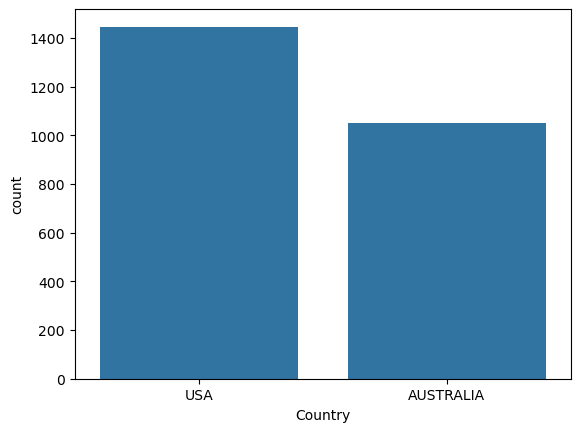

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Country",data=df_hipotesis)

Ordenamos por total de ataques fatales

In [232]:
orden= df_hipotesis.sort_values(by='Ataques_Fatales', ascending=False)
orden

,Country,State,Location,Total_Ataques,Ataques_Fatales
571,AUSTRALIA,Queensland,"Ross River, Townsville",7,5
1675,USA,Florida,"Pensacola Bay, Escambia County",5,4
2347,USA,South Carolina,"Charleston Harbor, Charleston County",3,3
1060,USA,Alabama,Mobile Bay,3,3
600,AUSTRALIA,Queensland,Townsville,5,3
...,...,...,...,...,...
2197,USA,New York,"Kismet Beach, Suffolk County",1,0
2194,USA,New York,"Greenport Sound, Long Island",1,0
2156,USA,New Jersey,"In Matawan Creek, off NJ Clay Company brickyar...",1,0
2157,USA,New Jersey,"Long Branch, Monmouth County (offshore)",1,0


Crearemos una nueva columna que muestre el porcentaje de ataques fatales y aproximemos el resultado a 2 decimales.

In [233]:

orden['Porcentaje_Muerte'] = (orden['Ataques_Fatales'] / orden['Total_Ataques']) * 100

orden['Porcentaje_Muerte'] = orden['Porcentaje_Muerte'].round(2)

orden

,Country,State,Location,Total_Ataques,Ataques_Fatales,Porcentaje_Muerte
571,AUSTRALIA,Queensland,"Ross River, Townsville",7,5,71.43
1675,USA,Florida,"Pensacola Bay, Escambia County",5,4,80.00
2347,USA,South Carolina,"Charleston Harbor, Charleston County",3,3,100.00
1060,USA,Alabama,Mobile Bay,3,3,100.00
600,AUSTRALIA,Queensland,Townsville,5,3,60.00
...,...,...,...,...,...,...
2197,USA,New York,"Kismet Beach, Suffolk County",1,0,0.00
2194,USA,New York,"Greenport Sound, Long Island",1,0,0.00
2156,USA,New Jersey,"In Matawan Creek, off NJ Clay Company brickyar...",1,0,0.00
2157,USA,New Jersey,"Long Branch, Monmouth County (offshore)",1,0,0.00


Filtraremos los datos considerados peligrosos, es decir, aquellos donde el porcentaje de muerte sea mayor o igual al 50%.

In [234]:
df_peligrosos = orden[orden['Porcentaje_Muerte'] >= 50]

df_peligrosos

,Country,State,Location,Total_Ataques,Ataques_Fatales,Porcentaje_Muerte
571,AUSTRALIA,Queensland,"Ross River, Townsville",7,5,71.43
1675,USA,Florida,"Pensacola Bay, Escambia County",5,4,80.00
2347,USA,South Carolina,"Charleston Harbor, Charleston County",3,3,100.00
1060,USA,Alabama,Mobile Bay,3,3,100.00
600,AUSTRALIA,Queensland,Townsville,5,3,60.00
...,...,...,...,...,...,...
2170,USA,New Jersey,"Sandy Hook Bay, Highlands, Monmouth County",2,1,50.00
1464,USA,Florida,"Garden Key, Charlotte County",1,1,100.00
39,AUSTRALIA,New South Wales,Bellambi Reef,2,1,50.00
2189,USA,New York,Brooklyn,2,1,50.00


Agruparemos los datos por país y contaremos cuántos casos peligrosos hay en cada uno.

In [235]:
casos = df_peligrosos.groupby('Country').size().reset_index(name='total_ataques_peligrosos')
casos

,Country,total_ataques_peligrosos
0,AUSTRALIA,246
1,USA,153


Si analizamos el total de ataques comparados con el total de muertos, revisamos los paises con más muertos y nos sale que australia tiene mas muerto que EEUU

<Axes: xlabel='Country', ylabel='total_ataques_peligrosos'>

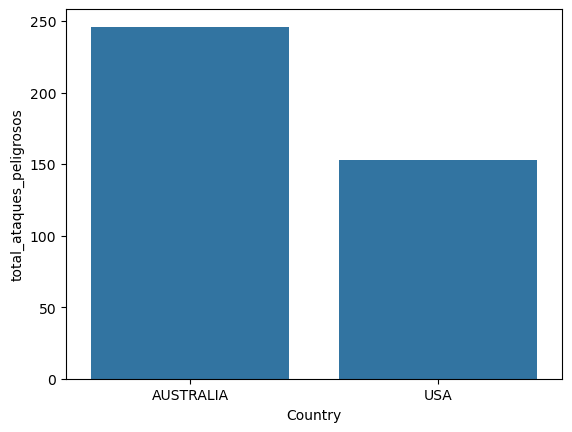

In [236]:

import seaborn as sns
sns.barplot(x="Country",y="total_ataques_peligrosos",data=casos)

2. Las actividades deportivas como el surf tienen más riesgo que las actividades de los bañistas. Aquí nos interesa ampliar en que horario hay más riesgo. (Variables: Activity, Fatal Y/N, Time)

**Fatal N/Y**

Como la variable Fatal Y/N tiene valores diferentes a "Y" y "N", hacemos una función que convierta todo a mayúsculas, elimine los espacios extra y filtre solo los resultados válidos (Y/N):

In [237]:
def clean_yes_no_column(df, column_name):

    df_clean = df.copy()
    
    df_clean[column_name] = df_clean[column_name].astype(str).str.upper().str.strip()
    
    df_clean = df_clean[df_clean[column_name].isin(["Y", "N"])]
    
    print(f"Valores únicos en '{column_name}':", df_clean[column_name].unique())
    
    return df_clean

In [238]:
df_clean = df.copy()

df_clean["Fatal Y/N"] = df_clean["Fatal Y/N"].astype(str).str.upper().str.strip()

df_clean = df_clean[df_clean["Fatal Y/N"].isin(["Y", "N"])]

print(df_clean["Fatal Y/N"].unique())

['N' 'Y']


## HIPÓTESIS 2 ##

Las actividades deportivas como el surf tienen más riesgo que las actividades de los bañistas. Aquí nos interesa ampliar en que horario hay más riesgo. (Variables: Activity, Fatal Y/N, Time)

**Activity**

Observamos que la actividad más repetida es el Surfing, por lo tanto vamos bien encaminados en nuestra hipótesis.

Para trabajar de forma práctica, primero decidimos hacer una limpieza básica de valores erróneos/fallos, convertir a mayus y quitar espacios. Seguidamente decidimos trabajar sobre 2 grupos de actividades: uno relacionado con el surf y otro con el baño.


- Creamos una nueva columna que se llama activity group para ir agrupando entre actividades acuáticas. En la creación de la columna tenemos "other", que agrupara los restantes.
- Filtramos por palabra "surf" y añadimos a SURF las coincidencias.
- Ahora añadimos las que tienen que ver son swim filtrando de la siguiente manera:
    - 1º las que contienen la palabra swim por swimming
    - 2º las que contienen la palabra bath por bathing y derivados
    - 3º las que contienen la palabra wad por wadding.

In [239]:
mas_repetido = df["Activity"].value_counts().idxmax()
print(f"La actividad más repedita es: {mas_repetido}")

La actividad más repedita es: Surfing


In [240]:
df["Activity"] = df["Activity"].astype(str).str.upper().str.strip()
df["Activity_group"] = "OTHER"

activity_map = {
    "SURF": "SURF",
    "SWIM|BATH|WAD": "SWIM"
}

for palabra, categoria in activity_map.items():
    filtro = df["Activity"].str.contains(palabra, na=False)
    df.loc[filtro, "Activity_group"] = categoria

In [241]:
df["Activity_group"].unique()

array(['SURF', 'OTHER', 'SWIM'], dtype=object)

In [242]:
df["Activity_group"].value_counts()

Activity_group
OTHER    3949
SWIM     1686
SURF     1430
Name: count, dtype: int64

Creamos un dataframe nuevo solo para la hipótesis 2 para que se quede solo con surf y swim:

In [243]:
df_activity = df[df["Activity_group"].isin(["SURF", "SWIM"])]

**Fatal Y/N**

In [244]:
df["Fatal Y/N"].unique()

array(['N', 'Y', 'F', 'M', nan, 'n', 'Nq', 'UNKNOWN', 2017, 'Y x 2', ' N',
       'N ', 'y'], dtype=object)

In [245]:
df["Fatal Y/N"].nunique()

12

Realizamos una limpieza básica.

Primero analizamos la columna Fatal Y/N para ver la cantidad de valores asociados y vamos limpiando:
- 1º conventir a mayus y quitar espacios.
- 2º poco a poco analizamos los valores que pueden convetirse en Y o en N ya que muchos se prestan a interpretación y en algún caso puede ser un error tipográfico ya que M será N. Por otro lado F se interpreta como Fatal y es valido convertirlo a Y.
- 3º optamos por utilizar map ya que los casos son muy concretos y fáciles de detectar.

Finalmente el resultado es un total de 3, de los cuales DESCONOCIDO no ES válidos.

In [246]:
df["Fatal Y/N"] = df["Fatal Y/N"].astype(str).str.upper().str.strip()

In [247]:
fatal_map = {
    "Y": "Y",
    "Y X 2": "Y",
    "2017": "Y",
    "F" : "Y",
    "N": "N",
    "M": "N",
    "NO": "DESCONOCIDO",
    "UNKNOWN": "DESCONOCIDO",
    "NAN": "DESCONOCIDO",
    "NQ" : "DESCONOCIDO"
}

df["Fatal Y/N"] = df["Fatal Y/N"].replace(fatal_map)

In [248]:
df["Fatal Y/N"].unique()

array(['N', 'Y', 'DESCONOCIDO'], dtype=object)

In [249]:
df["Fatal Y/N"].value_counts()

Fatal Y/N
N              4938
Y              1494
DESCONOCIDO     633
Name: count, dtype: int64

Creamos un nuevo dataframe filtrando lo que nos interesa:

In [250]:
df_fatal = df[df["Fatal Y/N"].isin(["Y", "N"])]

***Time*** 

Ahora empezamos a limpiar la columna "Time". Lo primero que observamos es diferencias de formatos además de otros valores que no son útiles. 
Ya que es un string, lo principal sería homogeneizarlo todo a periodos del día:
- MORNING → 06h a 14h
- AFTERNOON → 15h a 18h
- EVENING → 19h a 23h

Para llegar a ello:
1º convetrimos a mayus y quitamos espacio.
2º eliminamos todos los caracteres y símbolos que están visibles en la columna y sabemos que van a influir en la facilidad del ultimo paso de limpieza.

Seguidamente creamos la función que nos resolverá todo:
- En primer lugar convertira periodos de tiempo ya como valor en el dataframe original a los periodos de tiempo deseados.
- Por ultimo filtrará dentro del formato de hora los dos primeros digitos en base a las condiciones. Luego los asignara a los periodos del día.

In [251]:
df = df.dropna(subset=["Time"])

In [252]:
df["Time"] = (
    df["Time"]
    .astype(str)
    .str.upper()
    .str.strip()
    .str.replace(r"HRS|HR|H|[:./\-\(\)\"',`]", "", regex=True)
)

In [253]:
def periodos(time):

    time = str(time).upper().strip()

    if "MIDDAY" in time or "MORNING" in time:
        return "MAÑANA"
    elif "AFTERNOON" in time:
        return "TARDE"
    elif "EVENING" in time:
        return "NOCHE"
    elif "NIGT" in time:
        return "NOCHE"

    
    digits = ""           
    for c in time:
        if c.isdigit():
            digits += c
        else:
            break

    if digits:
        hour = int(digits)

        
        if hour >= 100:
            hour = hour // 100

        if 6 <= hour <= 14:
            return "MAÑANA"
        elif 15 <= hour <= 18:
            return "TARDE"
        elif 19 <= hour <= 23:
            return "NOCHE"

    return "DESCONOCIDO"

In [254]:
df["Time_group"] = df["Time"].apply(periodos)

In [255]:
df["Time_group"].unique()

array(['DESCONOCIDO', 'TARDE', 'MAÑANA', 'NOCHE'], dtype=object)

Creamos un nuevo datafram filtrando lo que nos interesa:

In [256]:
df_tiempo = df[df["Time_group"].isin(["MAÑANA", "TARDE", "NOCHE"])]

***Comparación Hipótesis 2***

In [257]:
df_activity = df[df["Activity_group"].isin(["SURF", "SWIM"])]

In [258]:
df_fatal = df[df["Fatal Y/N"].isin(["Y", "N"])]

In [259]:
df_tiempo = df[df["Time_group"].isin(["MAÑANA", "TARDE", "NOCHE"])]

In [260]:
df_analisisH2= df[
    df["Activity_group"].isin(["SURF", "SWIM"]) &
    df["Fatal Y/N"].isin(["Y", "N"]) &
    df["Time_group"].isin(["MAÑANA", "TARDE", "NOCHE"])]

In [261]:
df_hipotesis2 = df.groupby(
    ["Activity_group", "Time_group"]
)["Fatal Y/N"]

In [262]:
df_hipotesis2.value_counts()

Activity_group  Time_group   Fatal Y/N  
OTHER           DESCONOCIDO  N               64
                             Y               28
                             DESCONOCIDO     11
                MAÑANA       N              635
                             Y              139
                             DESCONOCIDO     35
                NOCHE        N               75
                             Y               27
                             DESCONOCIDO     12
                TARDE        N              385
                             Y               66
                             DESCONOCIDO     28
SURF            DESCONOCIDO  N               40
                             DESCONOCIDO      1
                             Y                1
                MAÑANA       N              575
                             Y               49
                             DESCONOCIDO     18
                NOCHE        N               37
                             Y                3

In [263]:
tabla_H2 = pd.pivot_table(
    df_analisisH2,
    index=["Activity_group", "Time_group"],
    columns="Fatal Y/N",
    aggfunc="size"
)

In [264]:
tabla_H2

Fatal Y/N                    N    Y
Activity_group Time_group          
SURF           MAÑANA      575   49
               NOCHE        37    3
               TARDE       342   24
SWIM           MAÑANA      304  103
               NOCHE        48   20
               TARDE       251   99

<Axes: xlabel='Activity_group,Time_group'>

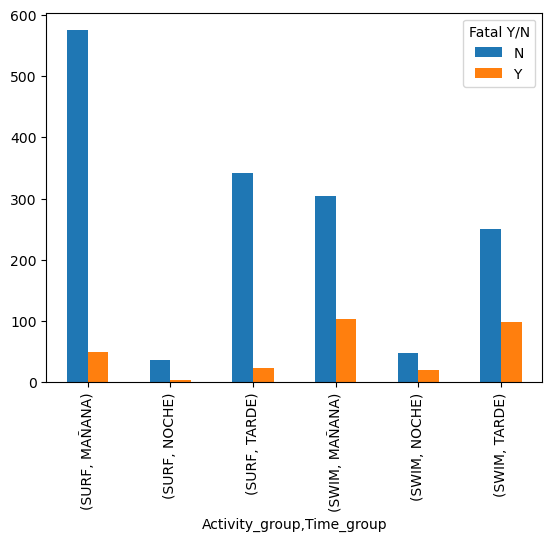

In [265]:
tabla_H2.plot(kind="bar")

## HIPÓTESIS 3 ##

3.Los ataques no provocados son más frecuentes y, además, presentan una mayor proporción de casos no fatales que los ataques provocados. (Variables: Type, Fatal Y/N)

Creamos el dataset de trabajo para el análisis de Type y Fatal Y/N:

In [266]:
dfhip3 = df[["Type","Fatal Y/N"]]
dfhip3

,Type,Fatal Y/N
0,Unprovoked,N
1,Unprovoked,Y
2,Unprovoked,N
3,Unprovoked,Y
4,Unprovoked,N
...,...,...
7004,Unprovoked,N
7005,Unprovoked,N
7006,Unprovoked,N
7022,Sea Disaster,Y


Analizamos en la función el Type

In [267]:
anali(dfhip3["Type"])

Type
Unprovoked             2963
Provoked                220
Invalid                 159
Watercraft              112
Sea Disaster             51
Questionable             19
unprovoked                1
 Provoked                 1
?                         1
Unverified                1
Under investigation       1
Boat                      1
Name: count, dtype: int64
['Unprovoked' 'Provoked' 'Questionable' 'unprovoked' ' Provoked'
 'Watercraft' 'Sea Disaster' '?' nan 'Unverified' 'Invalid'
 'Under investigation' 'Boat']
12


Ahora limpiamos la columna Type con la función de limpieza:

In [268]:
dfhip3 = dfhip3.dropna(subset=["Type"])

In [269]:
limpieza_type = limpiar(dfhip3,"Type")
limpieza_type

Type
UNPROVOKED             2964
PROVOKED                221
INVALID                 159
WATERCRAFT              112
SEA DISASTER             51
QUESTIONABLE             19
?                         1
UNVERIFIED                1
UNDER INVESTIGATION       1
BOAT                      1
Name: count, dtype: int64
10


,Type,Fatal Y/N
0,UNPROVOKED,N
1,UNPROVOKED,Y
2,UNPROVOKED,N
3,UNPROVOKED,Y
4,UNPROVOKED,N
...,...,...
7004,UNPROVOKED,N
7005,UNPROVOKED,N
7006,UNPROVOKED,N
7022,SEA DISASTER,Y


In [270]:
limpieza_type = limpiar(dfhip3,"Type")
limpieza_type

Type
UNPROVOKED             2964
PROVOKED                221
INVALID                 159
WATERCRAFT              112
SEA DISASTER             51
QUESTIONABLE             19
?                         1
UNVERIFIED                1
UNDER INVESTIGATION       1
BOAT                      1
Name: count, dtype: int64
10


,Type,Fatal Y/N
0,UNPROVOKED,N
1,UNPROVOKED,Y
2,UNPROVOKED,N
3,UNPROVOKED,Y
4,UNPROVOKED,N
...,...,...
7004,UNPROVOKED,N
7005,UNPROVOKED,N
7006,UNPROVOKED,N
7022,SEA DISASTER,Y


In [271]:
df_typefinal=interrogar(limpieza_type,"Type")
df_typefinal

Type
UNPROVOKED             2964
PROVOKED                221
INVALID                 159
WATERCRAFT              112
SEA DISASTER             51
QUESTIONABLE             19
                          1
UNVERIFIED                1
UNDER INVESTIGATION       1
BOAT                      1
Name: count, dtype: int64
10


,Type,Fatal Y/N
0,UNPROVOKED,N
1,UNPROVOKED,Y
2,UNPROVOKED,N
3,UNPROVOKED,Y
4,UNPROVOKED,N
...,...,...
7004,UNPROVOKED,N
7005,UNPROVOKED,N
7006,UNPROVOKED,N
7022,SEA DISASTER,Y


In [272]:
dfhip3_limpia = df_typefinal[df_typefinal['Type'].str.strip() != ""]
dfhip3_limpia

,Type,Fatal Y/N
0,UNPROVOKED,N
1,UNPROVOKED,Y
2,UNPROVOKED,N
3,UNPROVOKED,Y
4,UNPROVOKED,N
...,...,...
7004,UNPROVOKED,N
7005,UNPROVOKED,N
7006,UNPROVOKED,N
7022,SEA DISASTER,Y


In [273]:
anali(dfhip3_limpia["Type"])

Type
UNPROVOKED             2964
PROVOKED                221
INVALID                 159
WATERCRAFT              112
SEA DISASTER             51
QUESTIONABLE             19
UNVERIFIED                1
UNDER INVESTIGATION       1
BOAT                      1
Name: count, dtype: int64
['UNPROVOKED' 'PROVOKED' 'QUESTIONABLE' 'WATERCRAFT' 'SEA DISASTER'
 'UNVERIFIED' 'INVALID' 'UNDER INVESTIGATION' 'BOAT']
9


Aqui igualamos el type de accidente que es igual BOAT con WATERCRAFT

In [274]:
dfhip3_limpia["Type"] = dfhip3_limpia["Type"].replace("BOAT","WATERCRAFT")

/var/folders/p5/k72mxyjd6fq22gzlrpbtzhz40000gn/T/ipykernel_49213/1457485315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfhip3_limpia["Type"] = dfhip3_limpia["Type"].replace("BOAT","WATERCRAFT")


In [275]:
anali(dfhip3_limpia["Type"])

Type
UNPROVOKED             2964
PROVOKED                221
INVALID                 159
WATERCRAFT              113
SEA DISASTER             51
QUESTIONABLE             19
UNVERIFIED                1
UNDER INVESTIGATION       1
Name: count, dtype: int64
['UNPROVOKED' 'PROVOKED' 'QUESTIONABLE' 'WATERCRAFT' 'SEA DISASTER'
 'UNVERIFIED' 'INVALID' 'UNDER INVESTIGATION']
8


Quedaron al final 9 tipos de accidente

In [276]:
def clean_yes_no_column(df, column_name):

    df_clean = df.copy()
    
    df_clean[column_name] = df_clean[column_name].astype(str).str.upper().str.strip()
    
    df_clean = df_clean[df_clean[column_name].isin(["Y", "N"])]
    
    print(f"Valores únicos en '{column_name}':", df_clean[column_name].unique())
    
    return df_clean

In [277]:
df_fatal=clean_yes_no_column(dfhip3_limpia,"Fatal Y/N")
df_fatal

Valores únicos en 'Fatal Y/N': ['N' 'Y']


,Type,Fatal Y/N
0,UNPROVOKED,N
1,UNPROVOKED,Y
2,UNPROVOKED,N
3,UNPROVOKED,Y
4,UNPROVOKED,N
...,...,...
7004,UNPROVOKED,N
7005,UNPROVOKED,N
7006,UNPROVOKED,N
7022,SEA DISASTER,Y


Analizamos el data frame resultante

In [278]:
anali(df_fatal["Fatal Y/N"])

Fatal Y/N
N    2782
Y     583
Name: count, dtype: int64
['N' 'Y']
2


In [279]:
informe(df_fatal)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 3365 entries, 0 to 7028
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       3365 non-null   object
 1   Fatal Y/N  3365 non-null   object
dtypes: object(2)
memory usage: 78.9+ KB
None
Descripción estadística:
              Type Fatal Y/N
count         3365      3365
unique           8         2
top     UNPROVOKED         N
freq          2953      2782
Valores nulos:
Type         0
Fatal Y/N    0
dtype: int64
Tipos de datos:
Type         object
Fatal Y/N    object
dtype: object
Primeras 5 filas:
         Type Fatal Y/N
0  UNPROVOKED         N
1  UNPROVOKED         Y
2  UNPROVOKED         N
3  UNPROVOKED         Y
4  UNPROVOKED         N
Últimas 5 filas:
              Type Fatal Y/N
7004    UNPROVOKED         N
7005    UNPROVOKED         N
7006    UNPROVOKED         N
7022  SEA DISASTER         Y
7028    UNPROVOKED         Y
Forma del DataFrame

Observamos como queda el dataframe sin datos nulos

In [280]:
df_fatal


,Type,Fatal Y/N
0,UNPROVOKED,N
1,UNPROVOKED,Y
2,UNPROVOKED,N
3,UNPROVOKED,Y
4,UNPROVOKED,N
...,...,...
7004,UNPROVOKED,N
7005,UNPROVOKED,N
7006,UNPROVOKED,N
7022,SEA DISASTER,Y


Agrupamos los datos por tipo de accidente 

In [281]:
agrupado = df_fatal.groupby('Type').size().reset_index(name='Count')
agrupado

,Type,Count
0,INVALID,13
1,PROVOKED,219
2,QUESTIONABLE,18
3,SEA DISASTER,50
4,UNDER INVESTIGATION,1
5,UNPROVOKED,2953
6,UNVERIFIED,1
7,WATERCRAFT,110


Ordenamos los datos por tipo de accidente

In [282]:
ordenado=agrupado.sort_values(by="Count",ascending=False)
ordenado

,Type,Count
5,UNPROVOKED,2953
1,PROVOKED,219
7,WATERCRAFT,110
3,SEA DISASTER,50
2,QUESTIONABLE,18
0,INVALID,13
4,UNDER INVESTIGATION,1
6,UNVERIFIED,1


Ahora cambiaremos Fatal Y/N por binario para agruparlos

In [283]:
df_fatal["Fatal Y/N"] = df_fatal['Fatal Y/N'].map({'Y': 1, 'N': 0})
df_fatal

,Type,Fatal Y/N
0,UNPROVOKED,0
1,UNPROVOKED,1
2,UNPROVOKED,0
3,UNPROVOKED,1
4,UNPROVOKED,0
...,...,...
7004,UNPROVOKED,0
7005,UNPROVOKED,0
7006,UNPROVOKED,0
7022,SEA DISASTER,1


In [284]:
df_hipotesis3 = df_fatal.groupby('Type')['Fatal Y/N'].agg(['count', 'sum']).reset_index()

df_hipotesis3=df_hipotesis3.rename(columns={'count': 'Total_Ataques', 'sum': 'Ataques_Fatales'})
df_hipotesis3

,Type,Total_Ataques,Ataques_Fatales
0,INVALID,13,3
1,PROVOKED,219,5
2,QUESTIONABLE,18,7
3,SEA DISASTER,50,37
4,UNDER INVESTIGATION,1,0
5,UNPROVOKED,2953,531
6,UNVERIFIED,1,0
7,WATERCRAFT,110,0


In [285]:
ordenado= df_hipotesis3.sort_values(by= 'Ataques_Fatales', ascending=False)
ordenado

,Type,Total_Ataques,Ataques_Fatales
5,UNPROVOKED,2953,531
3,SEA DISASTER,50,37
2,QUESTIONABLE,18,7
1,PROVOKED,219,5
0,INVALID,13,3
4,UNDER INVESTIGATION,1,0
6,UNVERIFIED,1,0
7,WATERCRAFT,110,0


Veamos el porcentaje de ataques fatales por tipo de accidente. Agregamos una columna con el porcentaje redondeado a 2 decimales

In [286]:
ordenado['Porcentaje_Muerte'] = (ordenado['Ataques_Fatales'] / ordenado['Total_Ataques']) * 100

ordenado['Porcentaje_Muerte'] = ordenado['Porcentaje_Muerte'].round(2)


ordenado


,Type,Total_Ataques,Ataques_Fatales,Porcentaje_Muerte
5,UNPROVOKED,2953,531,17.98
3,SEA DISASTER,50,37,74.00
2,QUESTIONABLE,18,7,38.89
1,PROVOKED,219,5,2.28
0,INVALID,13,3,23.08
4,UNDER INVESTIGATION,1,0,0.00
6,UNVERIFIED,1,0,0.00
7,WATERCRAFT,110,0,0.00


## HIPÓTESIS 4 ##

Los ataques de tiburón son más frecuentes durante los meses de verano, en relación con mayor actividad turística en playas.
(Variables: Date (en concreto el mes), Location, Country)

Primero nos centramos en la limpieza de Date:

Hemos creado una función que limpie lo básico: nos quite los valores erróneos, convierta el texto a mayus, y nos quite los espacios innecesarios.
Observamos que hay un formato predominante que es dia-mes-año que nos facilita la limpieza. Posteriormente: 
- Hemos hecho uso de una función muy concreta que lee las fechas y convierte a formato dd-mm-aa en dígitos. 
- Hemos creado una columna específica de mes.
- Hemos rematado el uso de la función específica con otra que lee el formato convertido y lo traslada al nombre del mes.

Tratandose de Australia, solo tendremos en cuenta los meses de Diciembre, Enero y Febrero que son los meses de verano.

**Date**

In [287]:
def limpia_basica(x):
    if pd.isna(x):
        return x
    return str(x).upper().strip()

In [288]:
df["Date"] = df["Date"].apply(limpia_basica)

In [289]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

/var/folders/p5/k72mxyjd6fq22gzlrpbtzhz40000gn/T/ipykernel_49213/3693147909.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [290]:
df["Mes"] = df["Date"].dt.month_name()

In [291]:
df["Mes"].value_counts().sort_index()

Mes
April        275
August       352
December     256
February     220
January      302
July         391
June         301
March        236
May          240
November     221
October      293
September    340
Name: count, dtype: int64

Tenemos un resoltado total de ataques en los meses de verano:

In [323]:
ataques_por_mes = ataques_por_mes.loc[
    ["December", "January", "February"]
]
ataques_por_mes

Mes
December     98
January     108
February     86
Name: count, dtype: int64

Tras la limpieza de Date y filtrado en solo los meses de verano, observamos Country ya limpia de la hipótesis anterior:

***Country***

In [293]:
def limpiar(df,column_name):
    df_limpia=df.copy(  )
    df_limpia[column_name] = df_limpia[column_name].astype(str).str.replace('', '', regex=False).str.upper().str.strip()
    
    print(df_limpia[column_name].value_counts())
    print(df_limpia[column_name].nunique())
    return df_limpia

In [294]:
def interrogar(df,column_name):
   df_limpia2=df.copy()
   df_limpia2[column_name]=df[column_name].astype(str).str.replace('?', '', regex=False).str.upper()
   print(df_limpia2[column_name].value_counts())
   print(df_limpia2[column_name].nunique())
   return df_limpia2

In [295]:
df_limpia=limpiar(df,'Country')

Country
USA                               1669
AUSTRALIA                          752
SOUTH AFRICA                       364
BAHAMAS                             67
NEW ZEALAND                         61
                                  ... 
MALAYSIA                             1
TURKEY                               1
SOUTH PACIFIC OCEAN                  1
FEDERATED STATES OF MICRONESIA       1
RED SEA?                             1
Name: count, Length: 130, dtype: int64
130


In [296]:
df_limpia2=interrogar(df_limpia,'Country')

Country
USA                               1669
AUSTRALIA                          752
SOUTH AFRICA                       364
BAHAMAS                             67
NEW ZEALAND                         61
                                  ... 
MALAYSIA                             1
TURKEY                               1
SOUTH PACIFIC OCEAN                  1
FEDERATED STATES OF MICRONESIA       1
RED SEA                              1
Name: count, Length: 130, dtype: int64
130


Ahora comparamos los ataques por mes en Australia:

**Comparación Hipótesis 4**

In [313]:
df_analisisH4 = df[
    (df["Country"] == "AUSTRALIA") &
    (df["Mes"].isin(["December", "January", "February"])) 
]

In [318]:
ataques_por_mes = ataques_por_mes.loc[
    ["December", "January", "February"]
]
ataques_por_mes

Mes
December     98
January     108
February     86
Name: count, dtype: int64

In [324]:
tabla_H4 = (
    df_analisisH4
    .groupby(["Country", "Mes"])
    .size()
    .reset_index(name="Ataques_por_mes")
)

In [325]:
tabla_H4

,Country,Mes,Ataques_por_mes
0,AUSTRALIA,December,98
1,AUSTRALIA,February,86
2,AUSTRALIA,January,108


<Axes: xlabel='Mes', ylabel='count'>

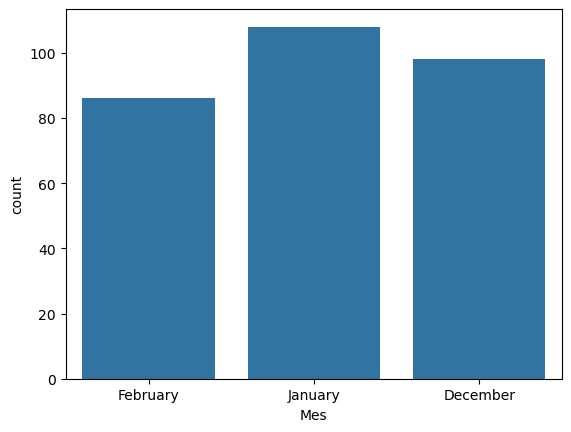

In [332]:
sns.countplot(x="Mes",data=df_analisisH4)